## Contents of the Notebook:
### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features(특성 분석).

2)Finding any relations or trends considering multiple features(어떤 관계 다중 특성 연관성 찾기).

### Part2: Feature Engineering and Data Cleaning(특성 다루기 및 데이터 처리):
1)Adding any few features(몇가지 아무 특성 추가).

2)Removing redundant features(불필요한 특성 제거).

3)Converting features into suitable form for modeling(모델링을 위한 적절한 형태로의 특성 변환).

### Part3: Predictive Modeling(예측 모델링)
1)Running Basic Algorithms(기본 알고리즘 실행).

2)Cross Validation(교차 검증).

3)Ensembling(앙상블).

4)Important Features Extraction(중요 특성 추출).

# Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('../input/titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked은 null 값을 가지고 있다. 이것을 고쳐보자.

### 얼마나 생존했을까?

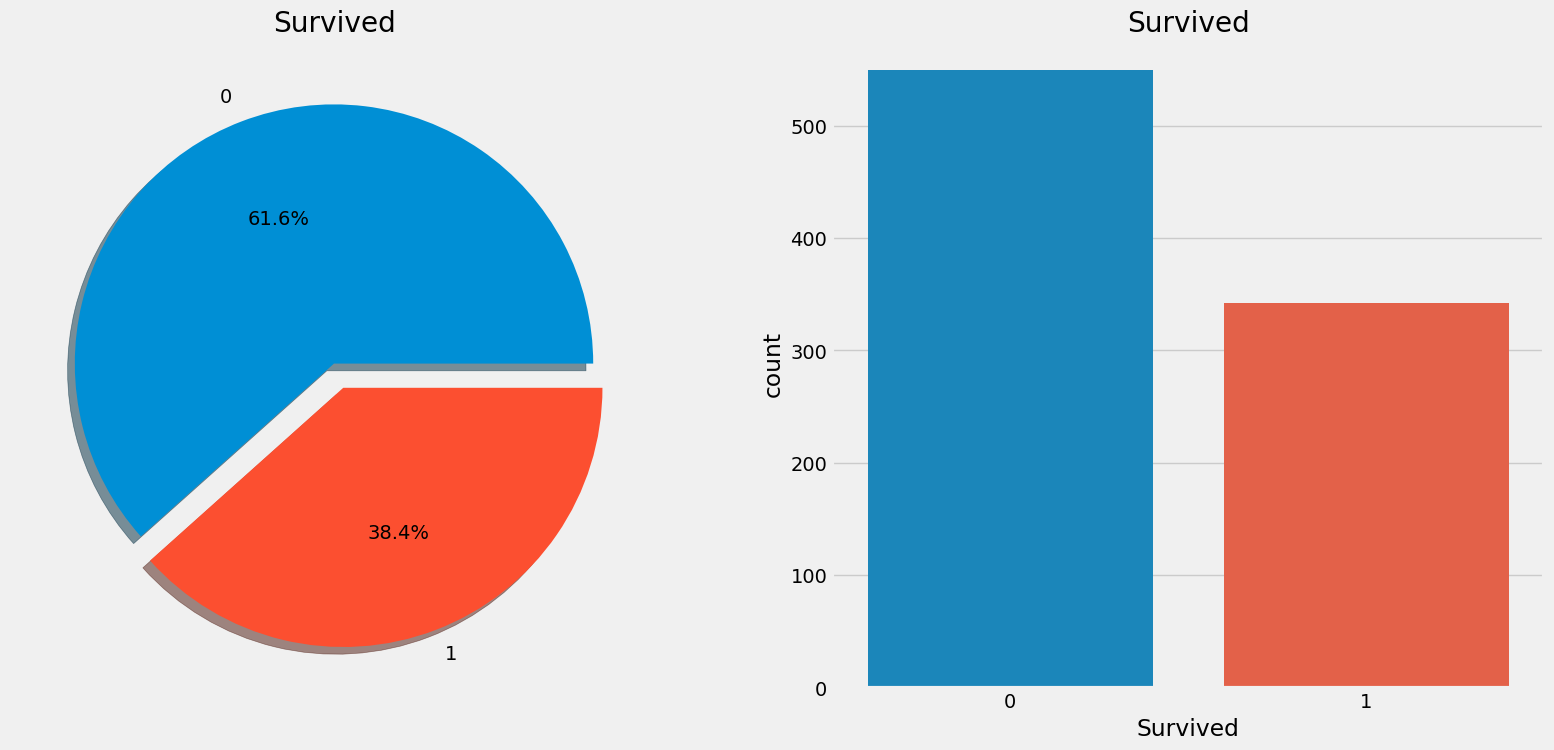

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

First let us understand the different types of features.

이것은 많은 사람들이 이 사고에서 살아남지 못한 증거다.

이 훈련 셋트에서 891명 중에 오직 대략 350명이 생존했다. i.e 전체 훈련 셋트에서 오직 38.4%만이 이 충돌에서 생존했다. 우리는 데이터로부터 그리고 어떤 카테고리가 승객을 살리고 못 살렸는지에 대해 나은 통찰을 얻기 위해 더 깊게 들어갈 필요가 있다. 

우리는 데이터셋의 다양한 피쳐(특성)들을 활용하면서 생존률을 확인할 것이다. 약간의 Sex, Port Of Embarcation, Age, 등등.

첫째로, 특성들의 다른 type에 대해 이해하자.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex, Embarked.

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 
For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: PClass

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Feature in the dataset: Age

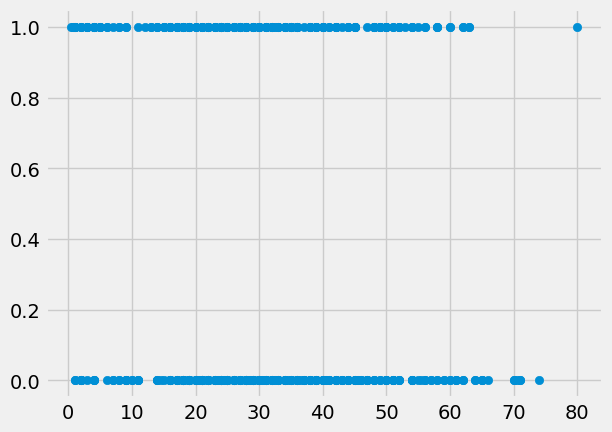

In [7]:
plt.scatter(data.loc[data['Age'].notnull(), 'Age'], data.loc[data['Age'].notnull(), 'Survived'])

### 카테고리컬 데이터를 다룰 때

순서가 있을 때:
- Label encoding

순서가 없을 때:
- one hot encoding

- frequency encoding

- mean encoding

## Analysing The Features

## Sex → Categorical Feature

In [8]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
data[['Sex', 'Survived']].groupby(['Sex'])

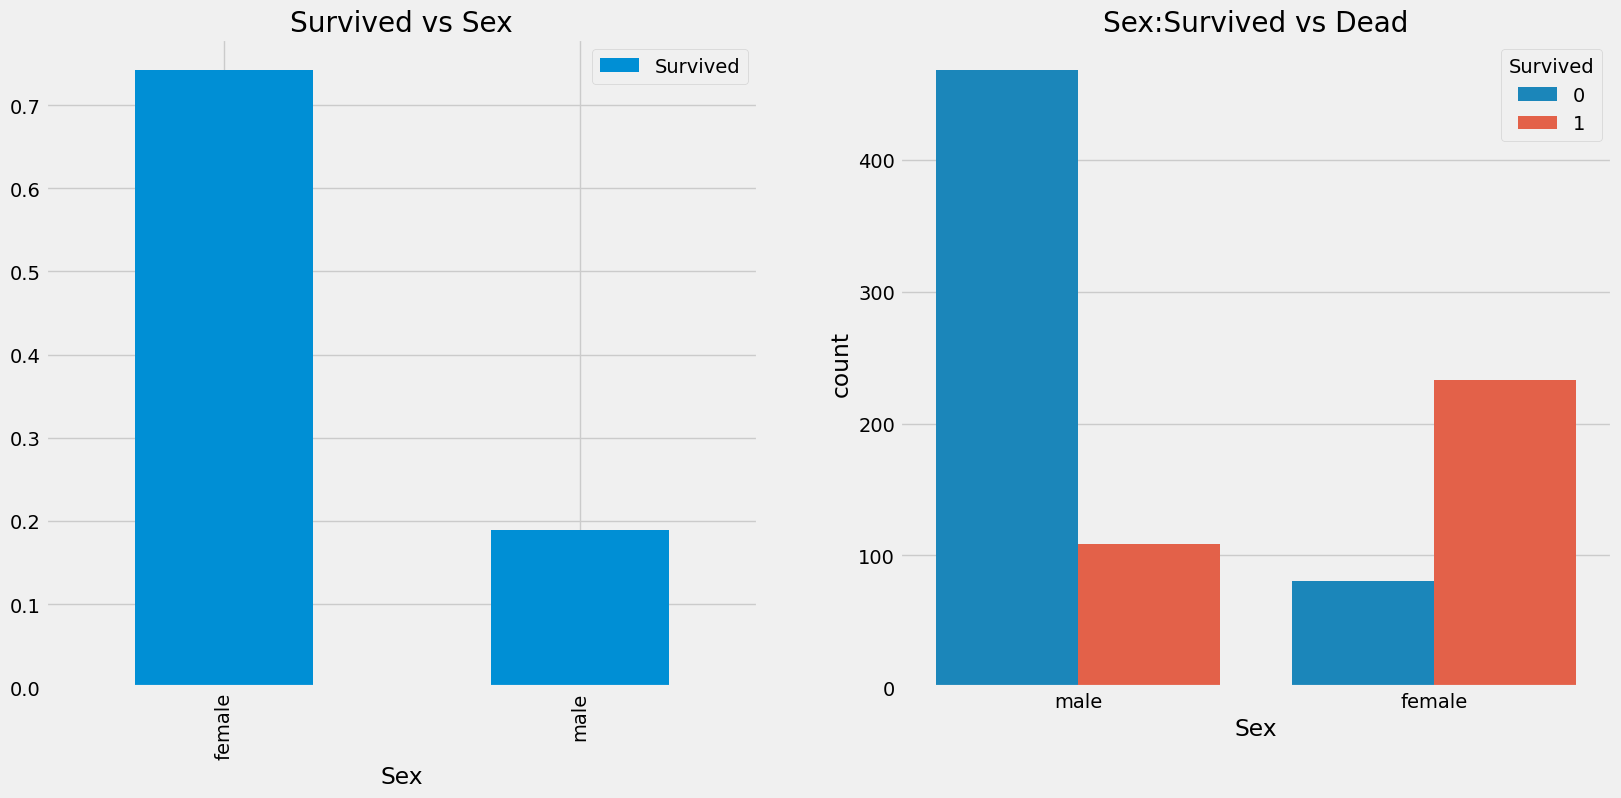

In [10]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks te be a very important feature for modeling. But is it the best?? Let's check other features.

### Pclass → Ordinal Feature

In [11]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


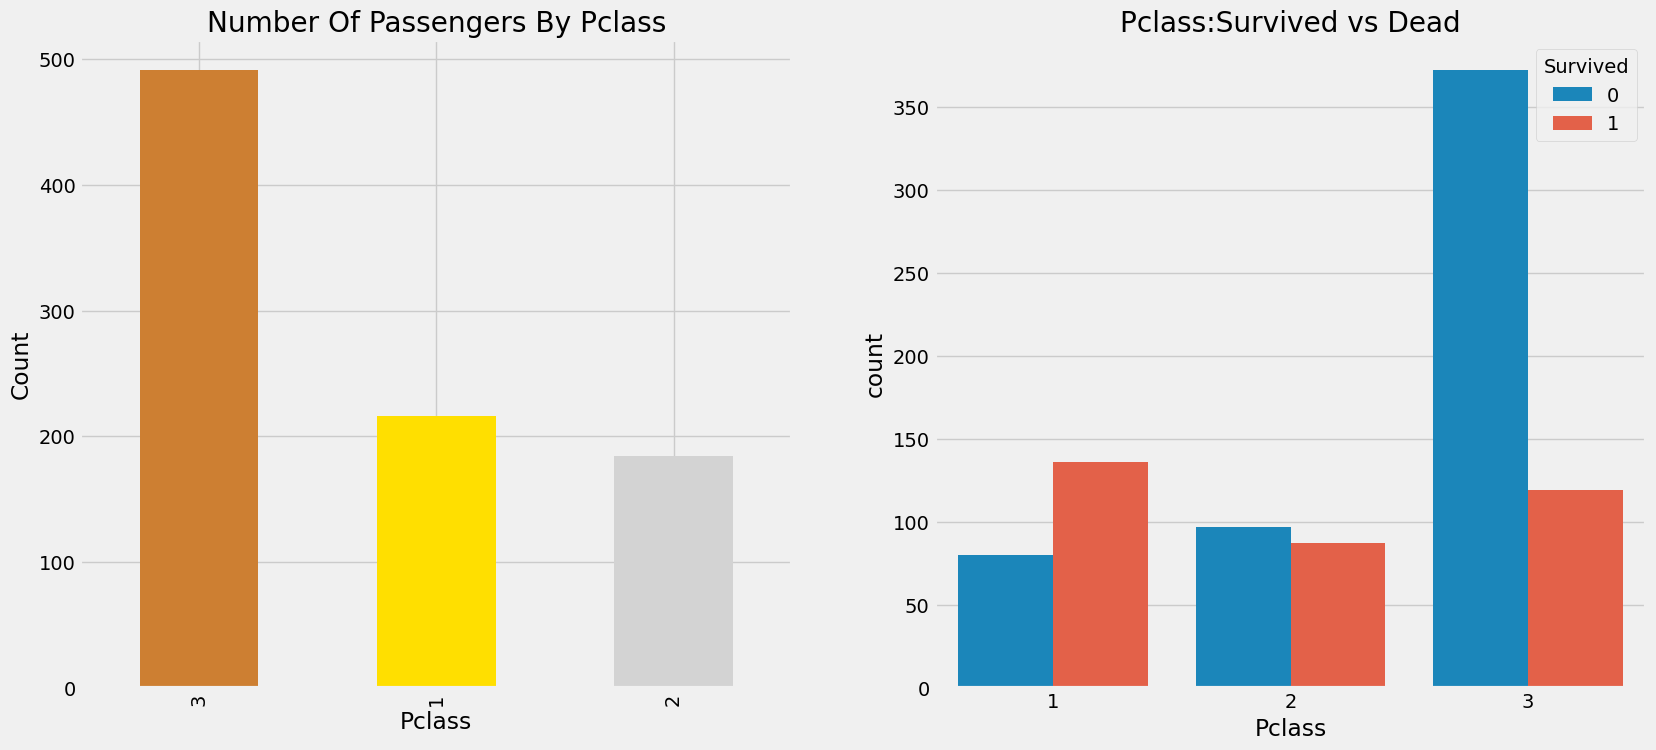

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passengers Of Pclass 1 were given a very hifh priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Let's check survival rate with Sex and Pclass Together.

In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

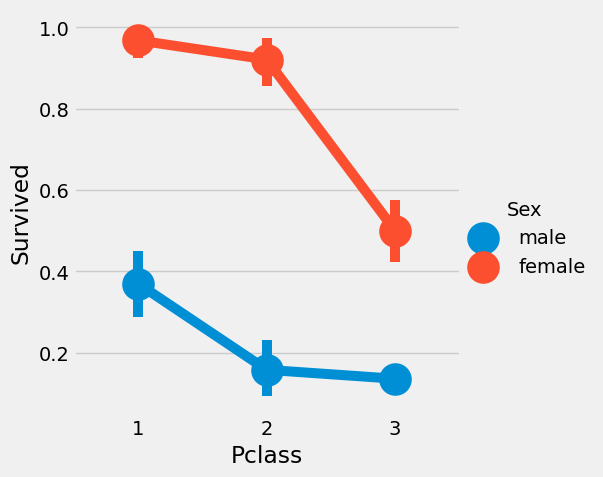

In [14]:
# Seaborn 라이브러리에서 factorplot()함수가 catplot()함수로 대체
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

We use Factorplot(catplot) in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot(catplot), we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very survival rate.

Looks like Pclass is also an important feature. Let's analyse other features.


### Age → Contunous Feature

In [15]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Text(0, 0.5, 'count')

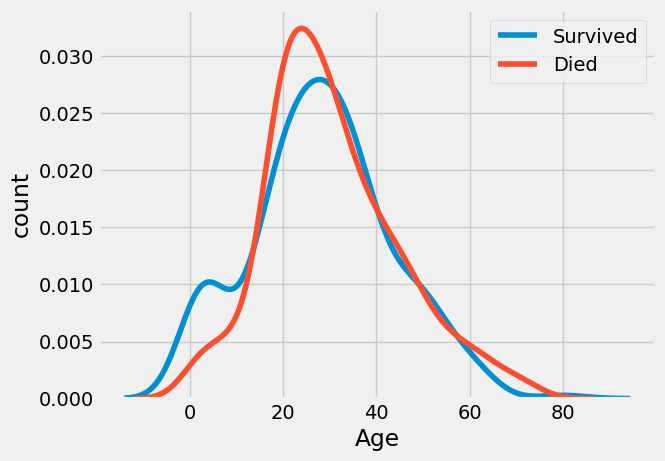

In [16]:
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], label='Survived')
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], label='Died')

plt.legend()
plt.xlabel('Age')
plt.ylabel('count')

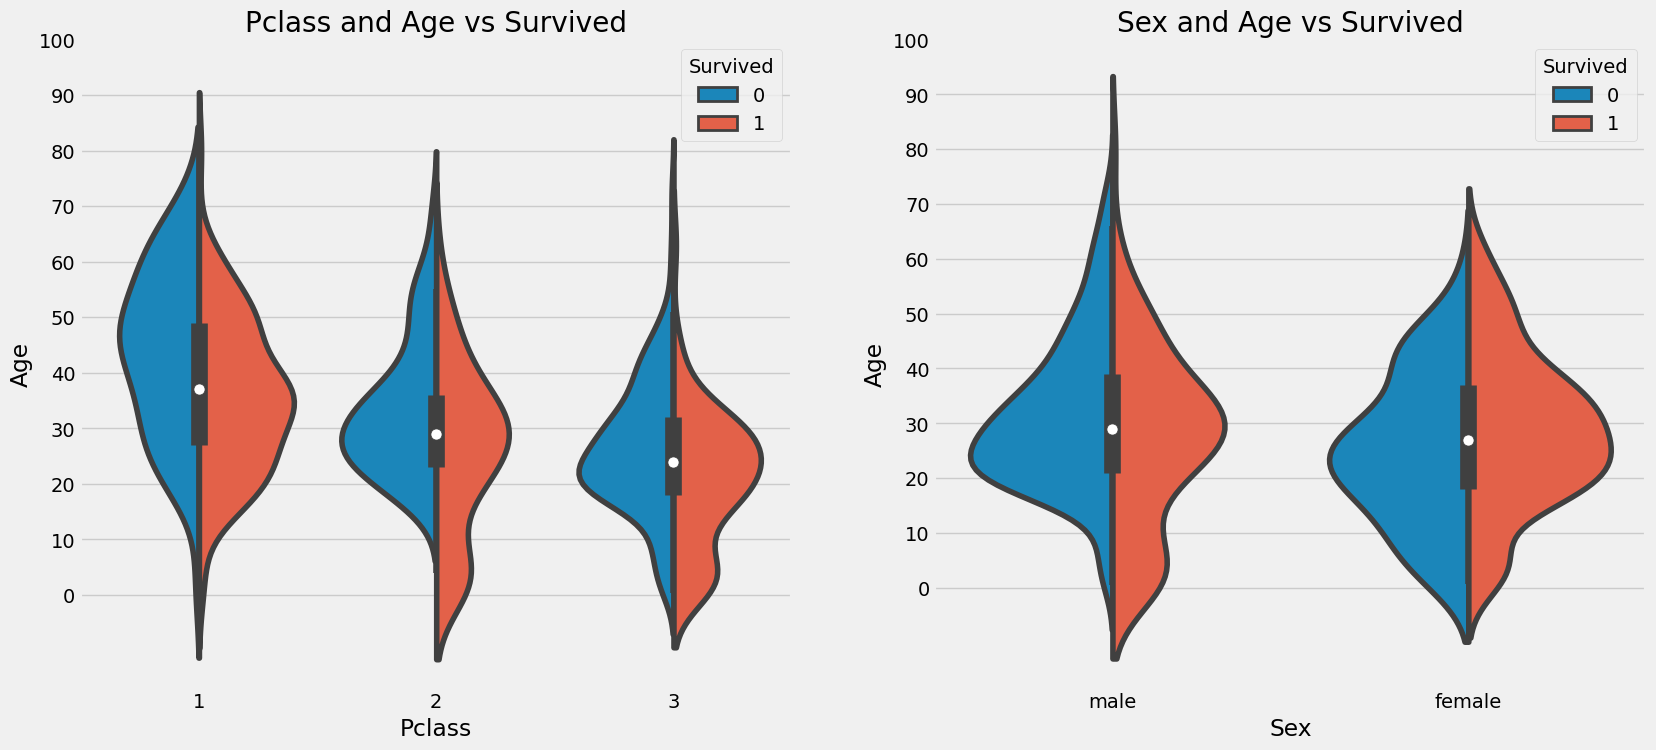

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### Observations:

1)The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just can't assgin a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

"What's In A Name??" → Feature :p

In [18]:
data['Initial']=0
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.') # let's extract the Saluations

In [19]:
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

Okay so here we are using the Regex: [A-Za-z]+).. 

So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). 

so we successfully extract the Initials from the Name.

In [20]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
# Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mile or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [21]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)
# inplace=True를 안하면 실제로 값이 안 바뀜

In [22]:
data.groupby('Initial')['Age'].mean() # let's check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [23]:
## Assigning the NaN values with the ceil values of the mean ages
data.loc[(data.Age.isnull())&(data['Initial'] == 'Mr'), "Age"] = 33
data.loc[(data.Age.isnull())&(data['Initial'] == 'Mrs'), "Age"] = 36
data.loc[(data.Age.isnull())&(data['Initial'] == 'Master'), "Age"] = 5
data.loc[(data.Age.isnull())&(data['Initial'] == 'Miss'), "Age"] = 22
data.loc[(data.Age.isnull())&(data['Initial'] == 'Other'), "Age"] = 46

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [25]:
data.Age.isnull().any() #So no null values left finally

False

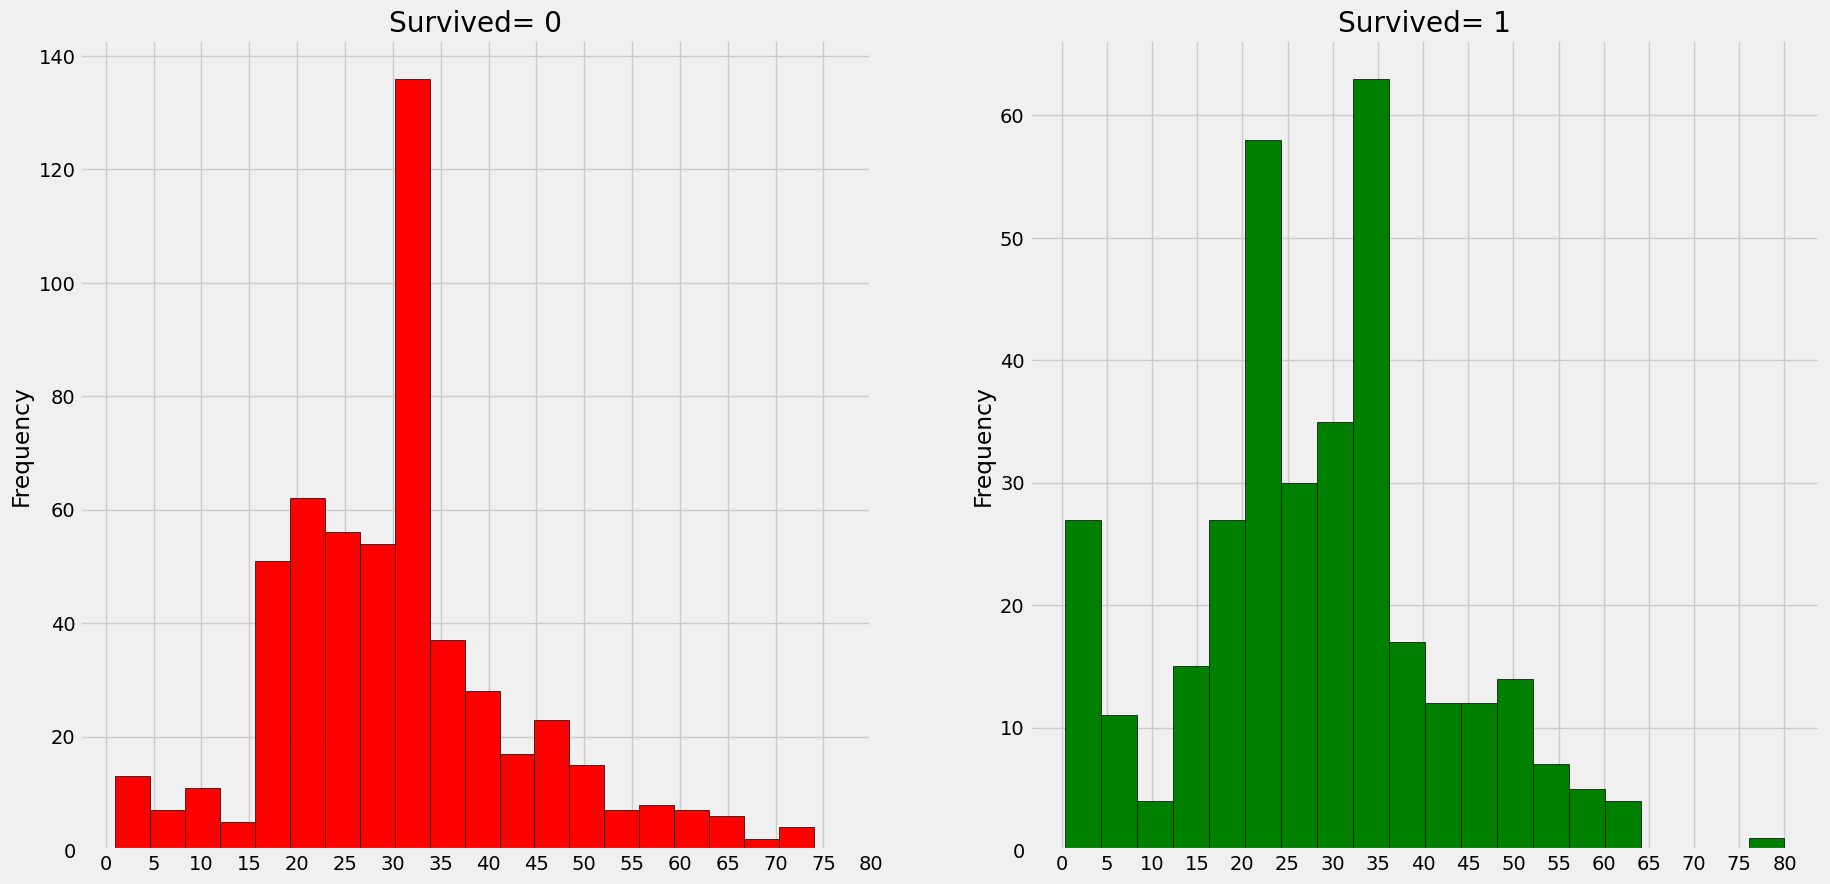

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

### Observations:

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

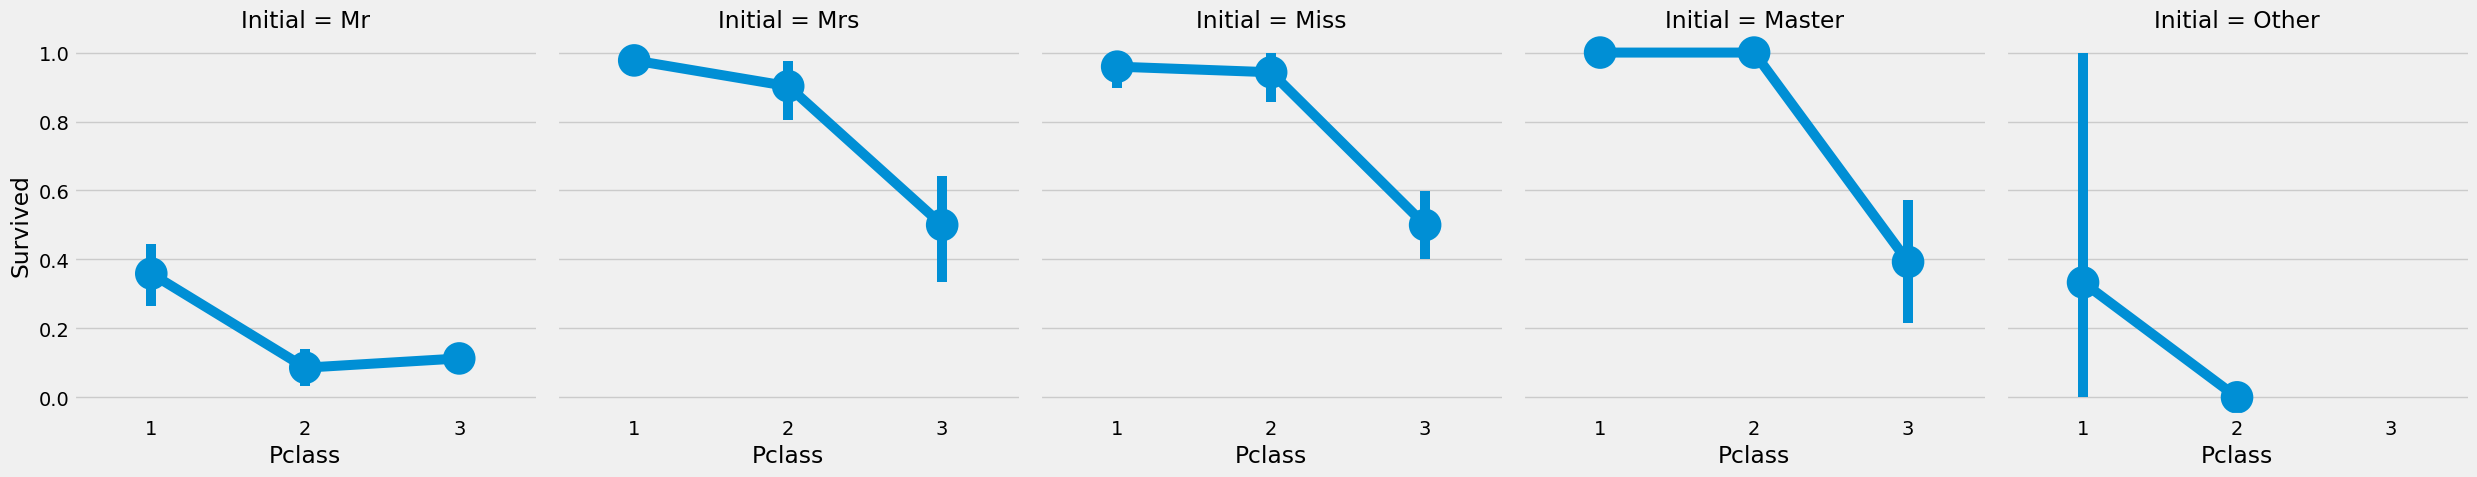

In [27]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

The Women and Child first policy thus holds ture irrespective of the class.

### Embarked → Categorical Value

In [28]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

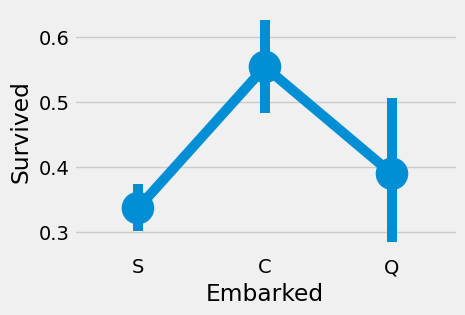

In [29]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

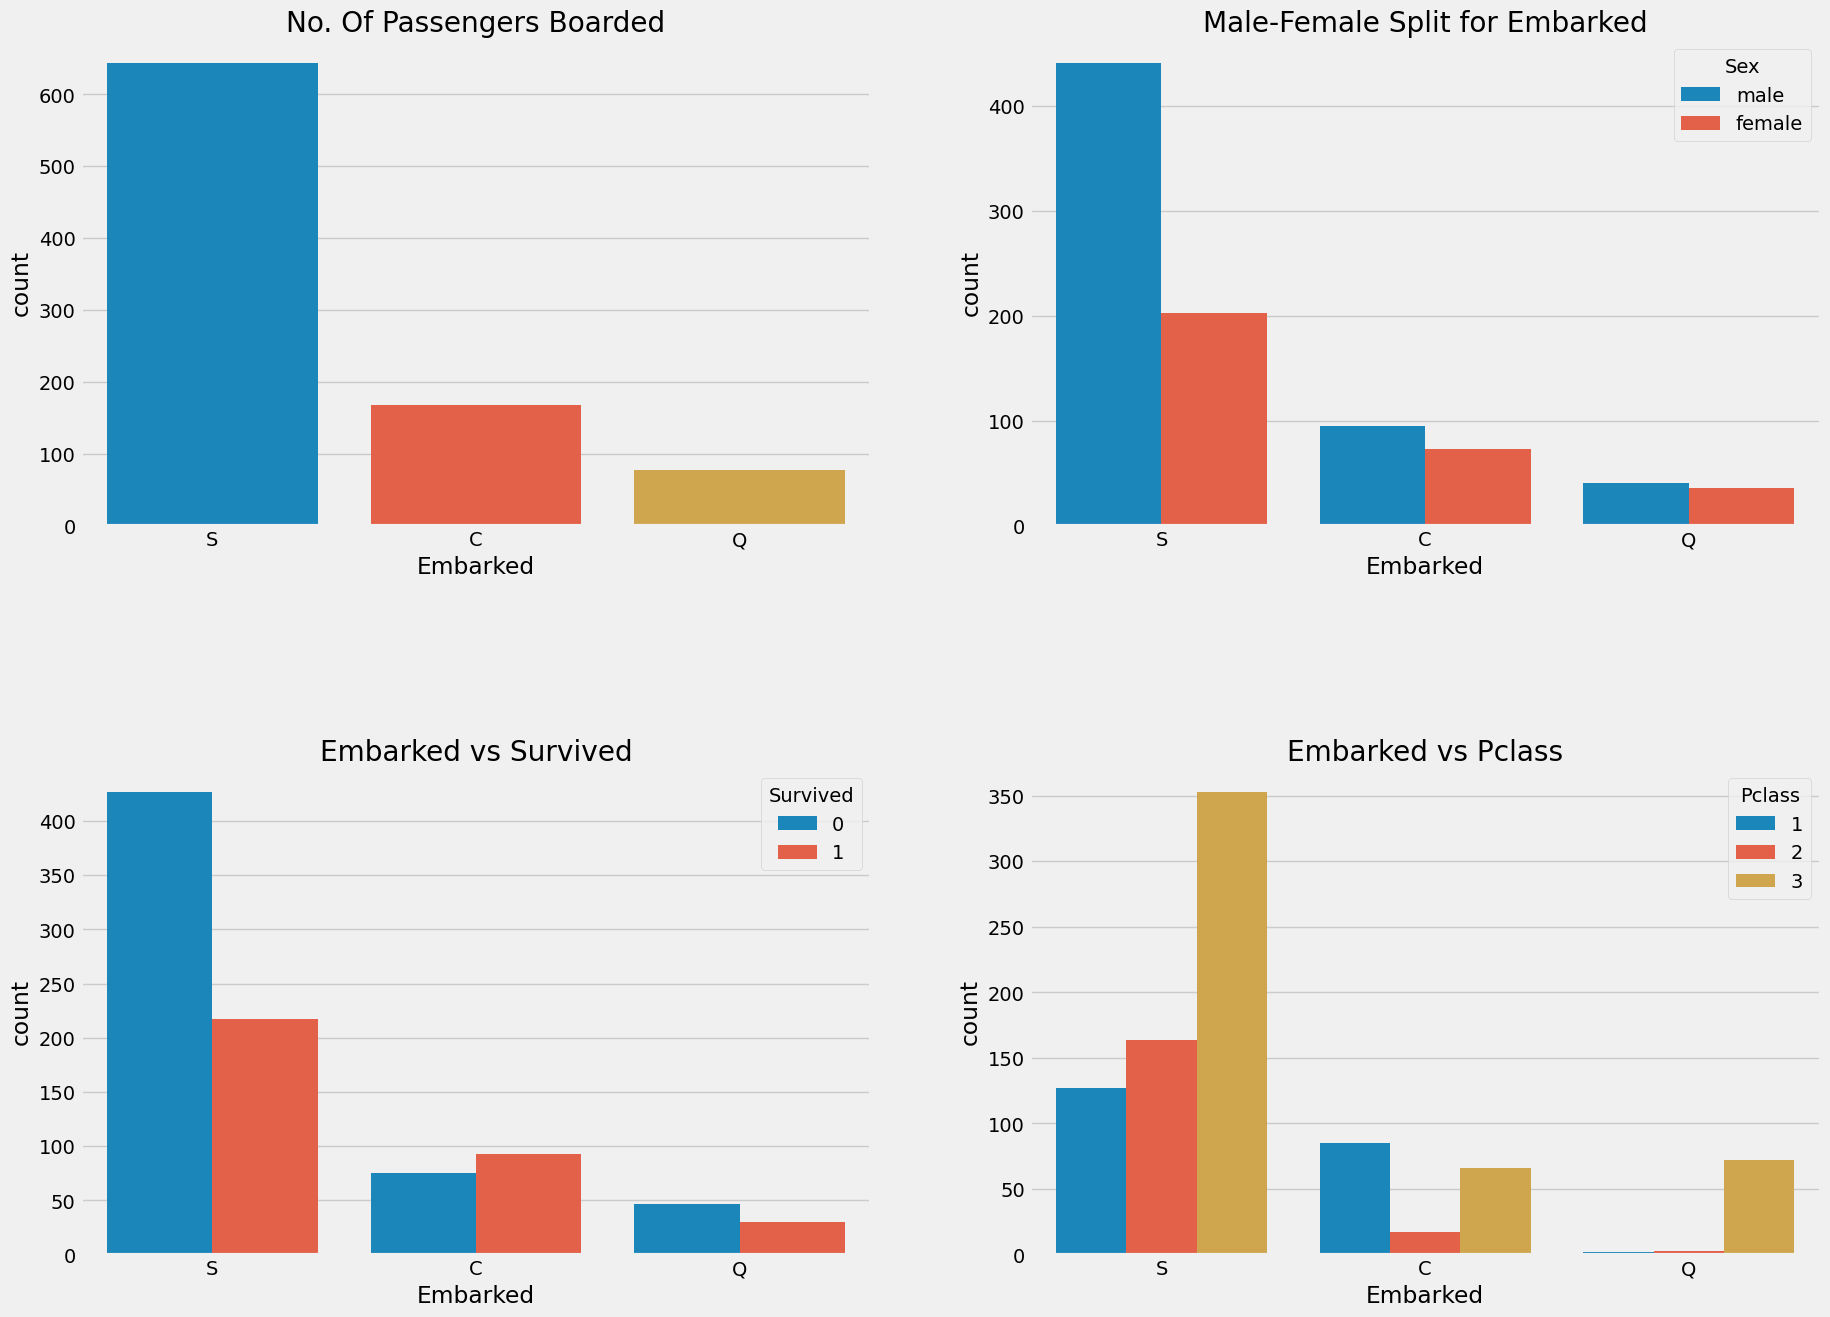

In [30]:
f, ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Observations:

1)Maximum passengers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.

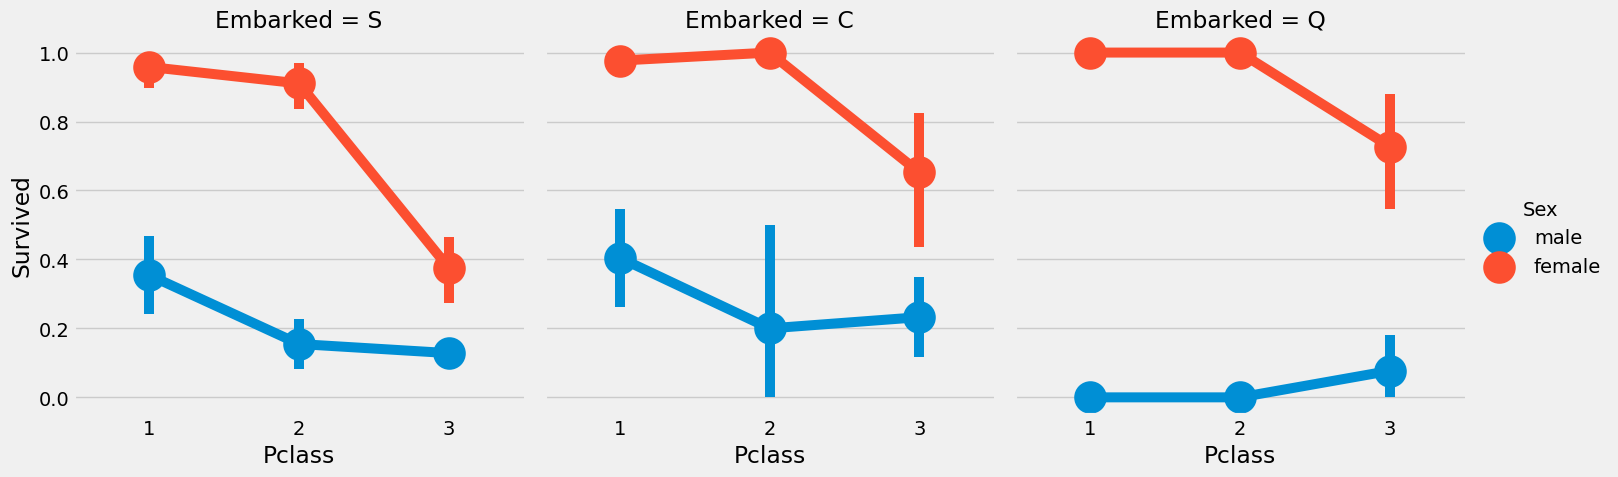

In [31]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

#### Obesrvations:

1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.(Money Matters)

3)Port Q looks to be unluckiest for Men, as almost all were from Pclass 3.

#### Filling Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [32]:
data['Embarked'].isnull().value_counts()

Embarked
False    889
True       2
Name: count, dtype: int64

In [33]:
data['Embarked'].fillna('S',inplace=True)

In [34]:
data['Embarked'].isnull().sum()

0

### SibSip → Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [35]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


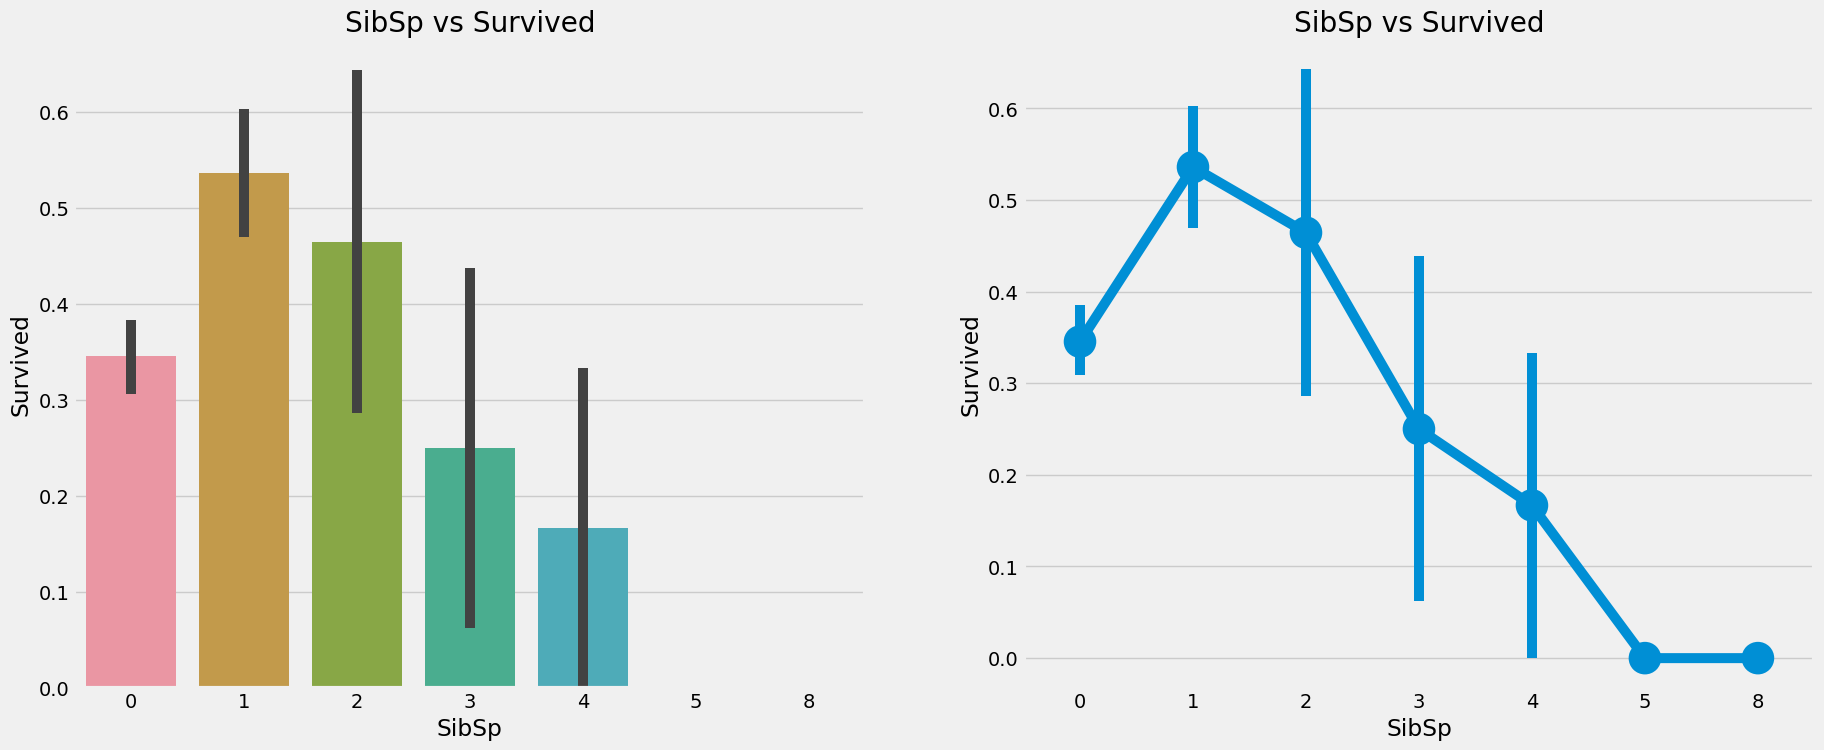

In [36]:
f, ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [37]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations:
The barplot and factorplot(catplot, pointplot) shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first.
Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch

In [38]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.


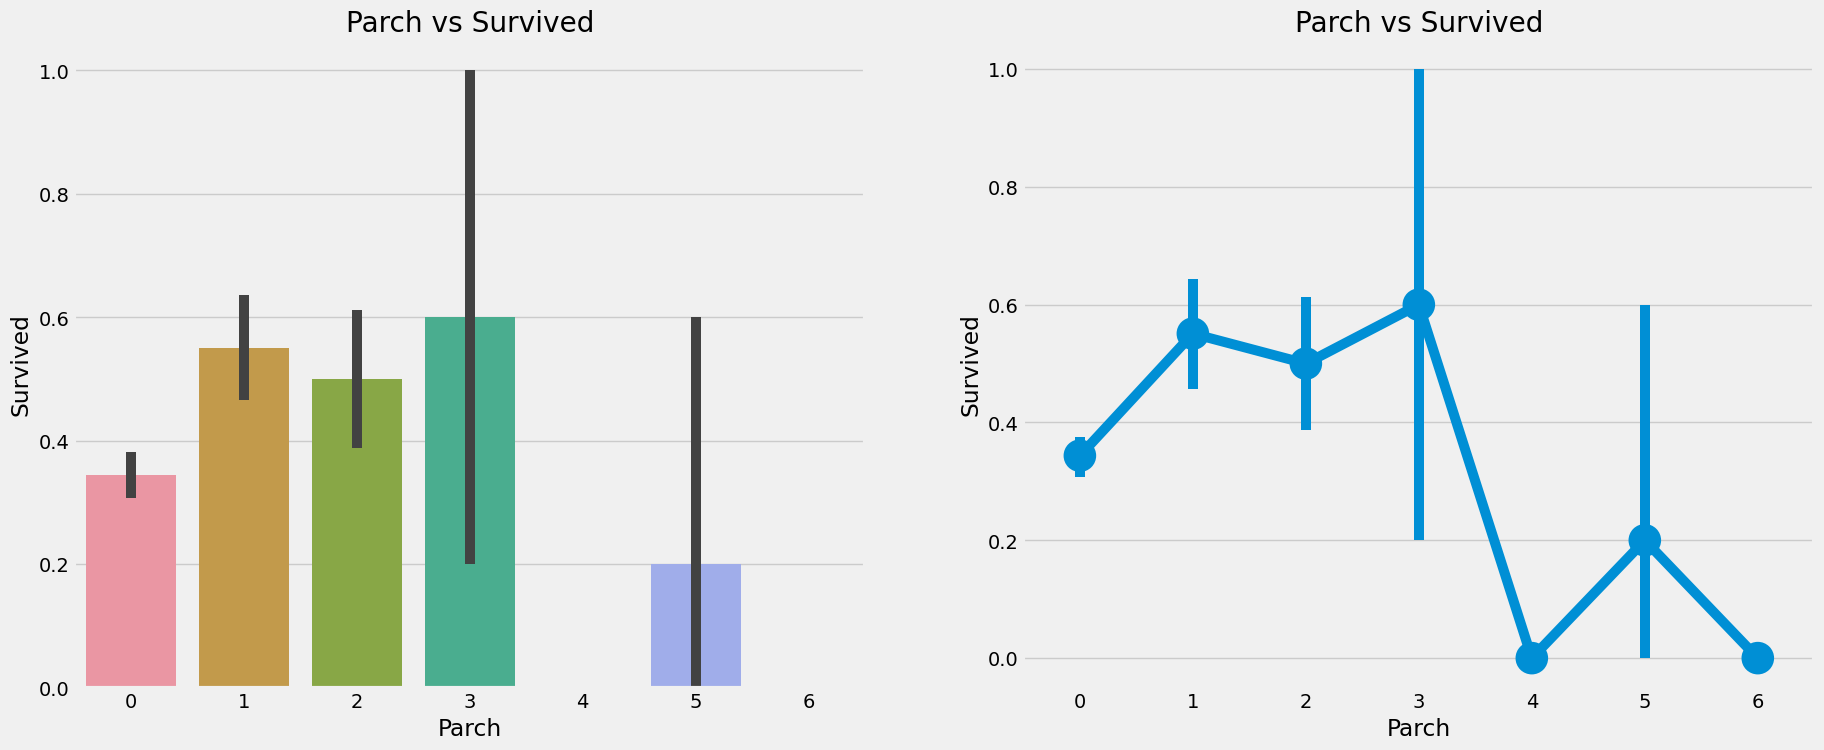

In [39]:
f,ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### Observations:
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

1st 클래스, 여성, S and C

SibSp > 3 생존율 낮다

In [40]:
data['new_cat_pclass_sex'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str)

<Axes: xlabel='new_cat_pclass_sex'>

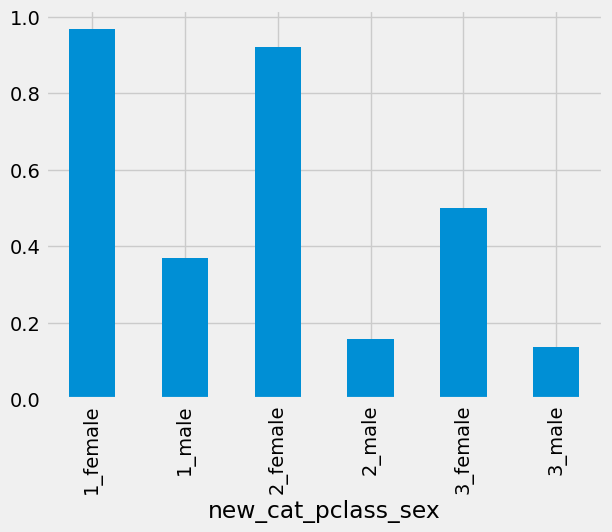

In [41]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

In [42]:
data['new_cat_pclass_sex_embarked'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str) + '_' + data['Embarked'].astype(str)

<Axes: xlabel='new_cat_pclass_sex_embarked'>

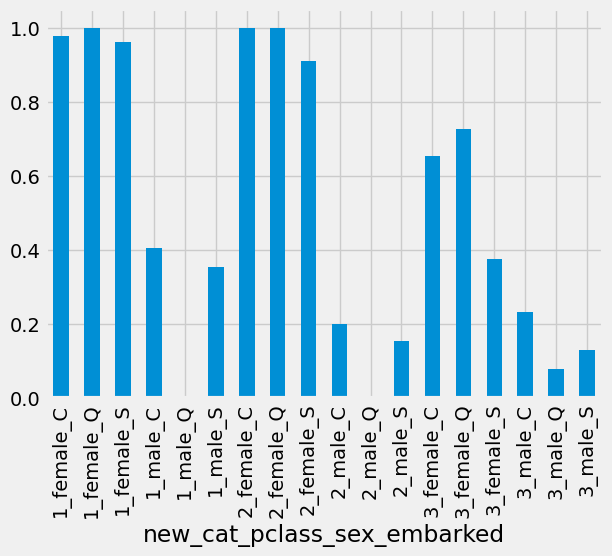

In [43]:
data.groupby('new_cat_pclass_sex_embarked')['Survived'].mean().plot.bar()

### Fare → Continous Feature

In [44]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


The lowest fare is 0.0. Wow!! a free luxorious ride.

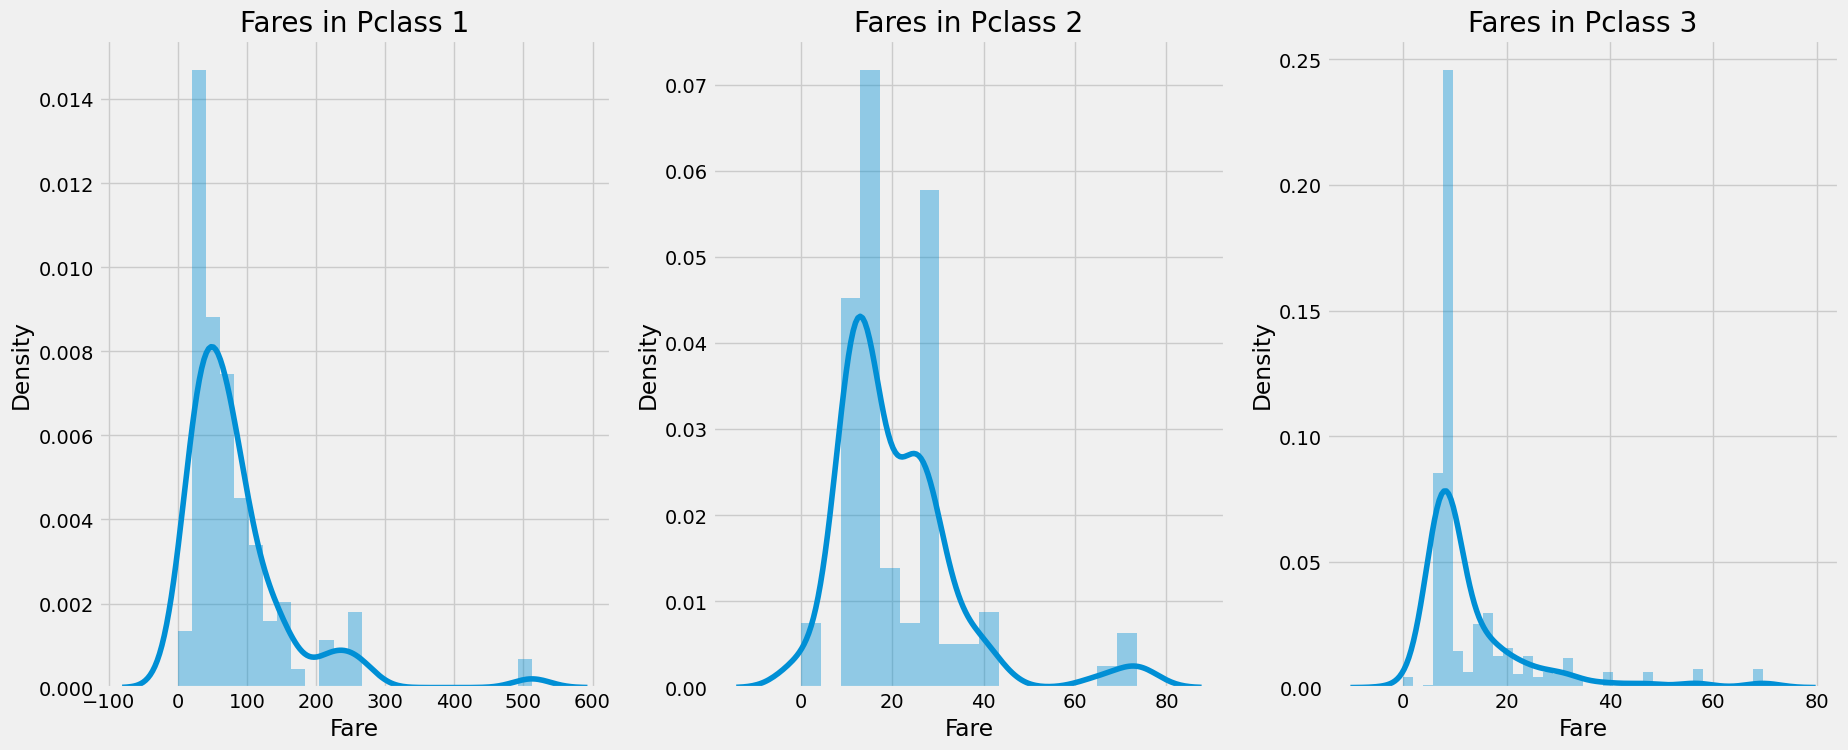

In [45]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

### Observations in a Nutshell for all features:
**Sex**: The chance of survival for women is high as compared to men.

**Pclass**: There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

**Parch + SibSp**: Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large family travelling with you.

### 모든 피쳐(특성)에 대한 간단 정리
**Sex**: 남성에 비해 여성의 생존율이 더 높다.

**Pclass**: 1st 클래스 승객들은 더 좋은 생존율을 보여준다. Pclass3의 생존율은 매우 낮다. 여성의 경우, Pclass1의 생존율이 거의 1에 가까우며 Pclass2보다 훨 높다. 돈은 승리한다.

**Age**: 5-10세 이하 아이들은 높은 생존율을 갖는다. 15-35세 범위의 나이 그룹 승객들은 많이 죽었다.

**Embarked**: 이것은 매우 중요한 피쳐(특성)입니다. C에서의 생존율은 대다수의 Pclass1의 승객들이 S에서의 비율보다 좋아보입니다. Q에서의 탑승객은 전부 Pclass3이었습니다.

**Parch + SibSp**: 1-2명의 형제자매, 배우자 또는 부모 1-3명이 혼자 여행하거나 대가족이 함께 여행하는 것보다 생존률이 더 높습니다.

### Correlation Between The Features

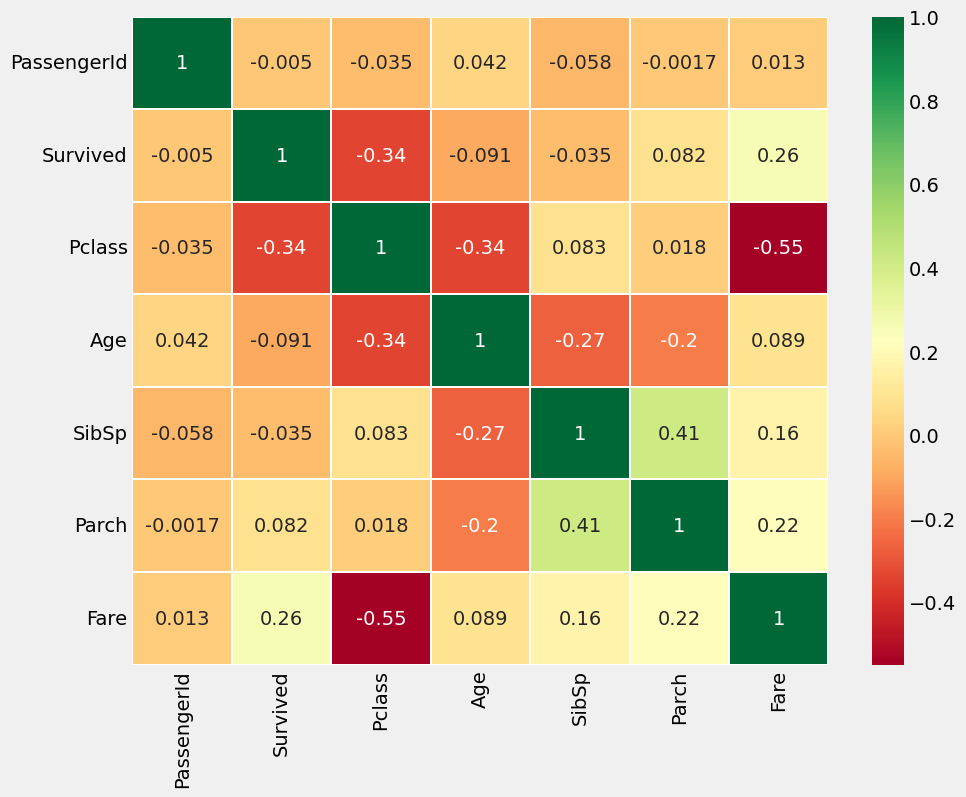

In [46]:
numeric_data = data.select_dtypes(include=[int, float])
sns.heatmap(numeric_data.corr(),annot=True, cmap='RdYlGn', linewidths=0.2) 
#data.corr() --> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION**: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

#### 히트맵 해석 
가장 먼저 주목해야 할 점은 알파벳이나 문자열 사이의 상관 관계가 없다는 것이 명백하기 때문에 숫자 특징만 비교된다는 것입니다. 플롯을 이해하기 전에 정확히 상관관계가 무엇인지 살펴보겠습니다. 

- **양의 상관 관계**: 특성 A의 증가가 특성 B의 증가로 이어진다면 양의 상관 관계가 있습니다. 값 1은 완벽한 양의 상관 관계를 의미합니다. 

- **음의 상관 관계**: 특성 A의 증가로 인해 특성 B의 감소가 발생하면 음의 상관 관계가 있습니다. 값 -1은 완벽한 음의 상관관계를 의미합니다. 

이제 두 기능이 매우 또는 완벽하게 상관되어 있으므로 하나의 기능이 증가하면 다른 기능도 증가한다고 가정해 보겠습니다. 이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 없거나 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성이라고 합니다. 

그렇다면 둘 중 하나가 중복되므로 둘 다 사용해야 한다고 생각하십니까? 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점이 줄어들기 때문에 중복되는 기능을 제거하려고 노력해야 합니다. 

이제 위의 히트맵을 보면 기능 간의 상관관계가 별로 없음을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이, 즉 0.41입니다. 따라서 우리는 모든 기능을 계속 사용할 수 있습니다.

#### Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

#### 파트2: 특성 추출 및 데이터 정리
이제 특성 추출이란 무엇일까요? 

특성이 포함된 데이터 세트가 제공될 때마다 모든 특성이 중요할 필요는 없습니다. 제거해야 할 중복 기능이 많이 있을 수 있습니다. 또한 다른 특성에서 정보를 관찰하거나 추출하여 새로운 특성을 얻거나 추가할 수도 있습니다.

예를 들어 이름 기능을 사용하여 이니셜 기능을 가져오는 경우가 있습니다. 새로운 기능을 얻고 몇 가지를 제거할 수 있는지 살펴보겠습니다. 또한 기존 관련 기능을 예측 모델링에 적합한 형태로 변환할 것입니다.

#### Age_band
**Problem With Age Feature**:\
As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

#### Age_band 
**연령 특성의 문제**: 앞에서 연령이 연속 특성이라고 언급했듯이 기계 학습 모델의 연속 변수에는 문제가 있습니다. 

**예**:스포츠맨을 성별로 그룹화하거나 정리하면 남성과 여성으로 쉽게 구분할 수 있습니다. 이제 나이별로 그룹화하라고 하면 어떻게 하시겠습니까? 30명의 사람이 있는 경우 연령 값은 30개일 수 있습니다. 

이제 이것이 문제가 됩니다. 이러한 연속 값을 구간화 또는 정규화를 통해 범주형 값으로 변환해야 합니다. 저는 구간화를 사용할 것입니다. 즉, 다양한 연령대를 단일 구간으로 그룹화하거나 단일 값을 할당할 것입니다.

좋습니다. 승객의 최대 연령은 80세였습니다. 따라서 0-80 범위를 5개의 상자로 나누겠습니다. 그래서 80/5=16. 1개 상자의 범위는 16입니다.

In [47]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2


In [48]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


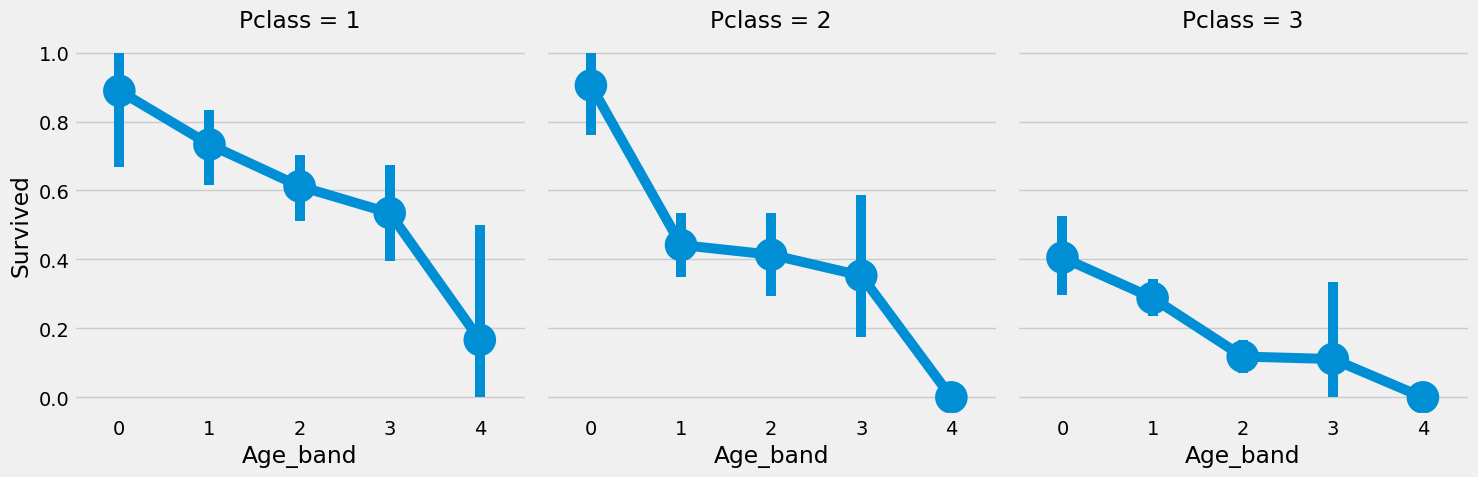

In [49]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind='point')
plt.show()

True that..the survival rate decreases as the age increases irrespective of the Pclass.

### Family_Size and Alone
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

### Family_Size and Alone
이 시점에서 "Family_size"와 "Alone"이라는 새로운 특성을 생성하고 분석할 수 있습니다. 이 기능은 Parch와 SibSp를 합친 것입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. 혼자(Alone)는 승객이 혼자인지 아닌지를 나타냅니다.

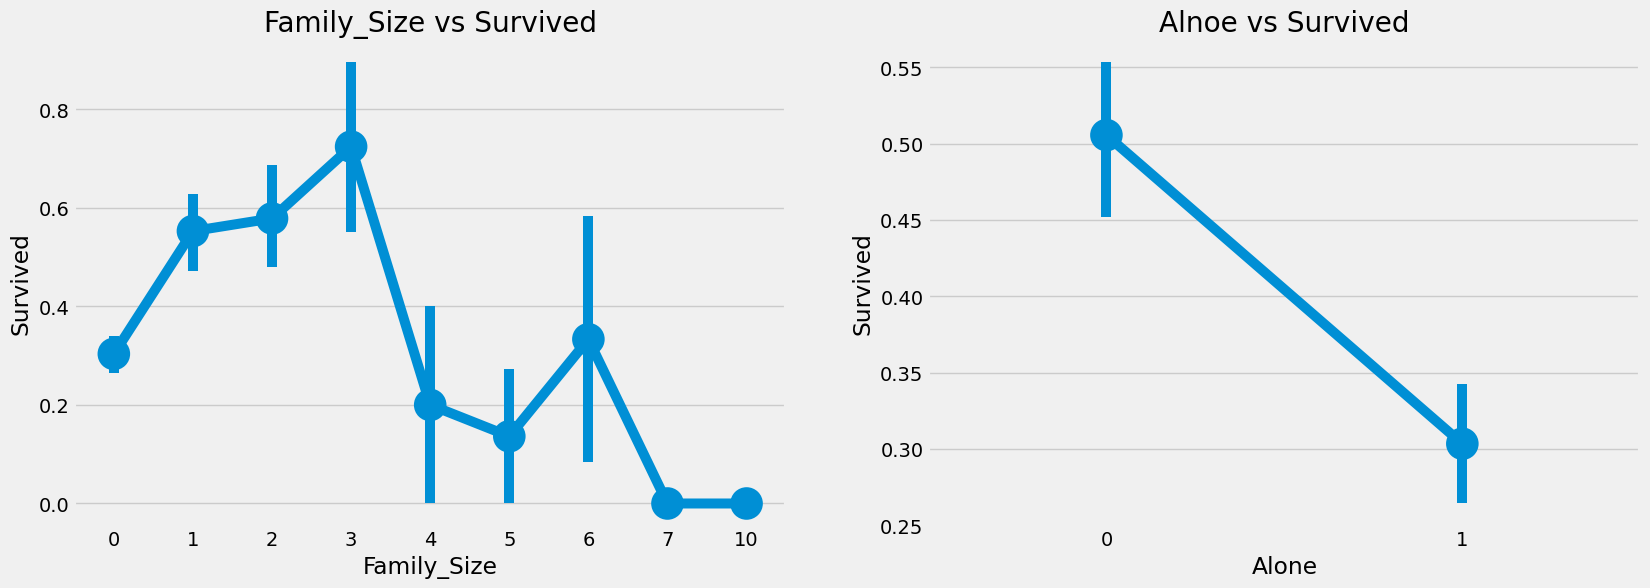

In [50]:
data['Family_Size']=0
data['Family_Size']=data['Parch'] + data['SibSp'] # family size
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 # Alone

f,ax=plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alnoe vs Survived')
#plt.close(2)
#plt.close(3)
plt.show()

**Family_Size=0 means that the passenger is alone.** Clearly, if you are alone or family_size=0, then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Let's examine this further.

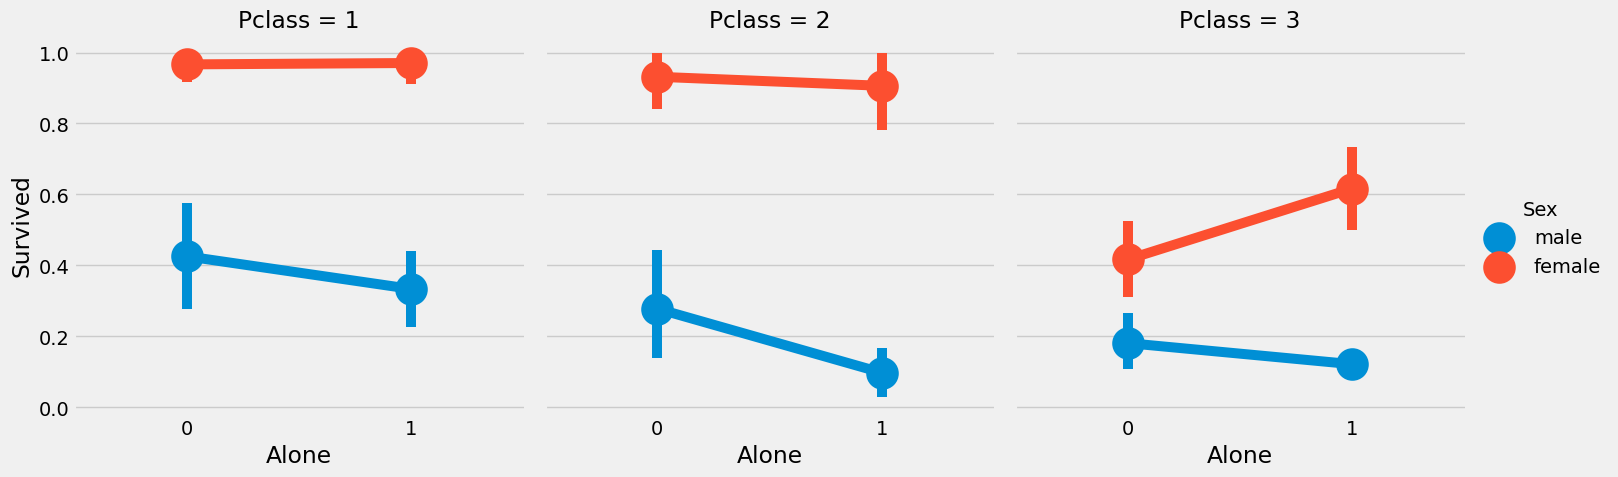

In [51]:
sns.catplot(x='Alone',y='Survived',data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

### Fare_Range
운임도 연속적인 특성이므로 순서형 값으로 변환해야 합니다. 이를 위해 **pandas.qcut**을 사용합니다. 

그래서 **qcut**이 하는 일은 우리가 통과한 bin의 수에 따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 bin을 전달하면 값이 5개의 별도 bin 또는 값 범위에 동일한 간격으로 배열됩니다.

In [52]:
# qcut은 샘플 수를 동일하게 범위 나누고
# cut은 구간 이동
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [53]:
data['Fare_Range'].value_counts()

Fare_Range
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

As discussed above, We can clearly see that as the **fare_range increases, the chances of survival increase**.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_Band**

In [54]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

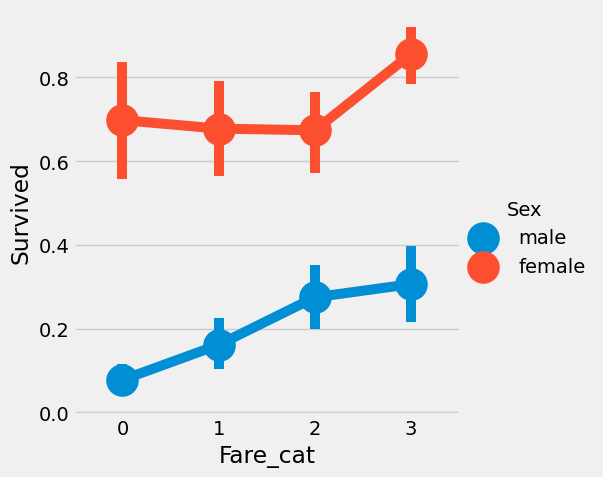

In [55]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [56]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### sklearn 라이브러리에서 LabelEncoder로 더 쉽게 하는 방법

In [57]:
#from sklearn.preprocessing import LabelEncoder

#cat_cols = [col for col in data.columns if data[col].dtypes == 'object']
#cat_cols

In [58]:
#for col in cat_cols:
#    encoder = LabelEncoder()
#   data[col] = encoder.fit_transform(data[col])

라벨이 엄청 많은 경우엔 LabelEncoder보다 factorize 사용하는게 더 빠르다.

In [59]:
# indexer = pd.factorize(data[col])

#### Dropping UnNeeded Features
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,3_male,3_male_S,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1_female,1_female_C,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,3_female,3_female_S,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,1_female,1_female_S,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,3_male,3_male_S,2,0,1,"(7.91, 14.454]",1


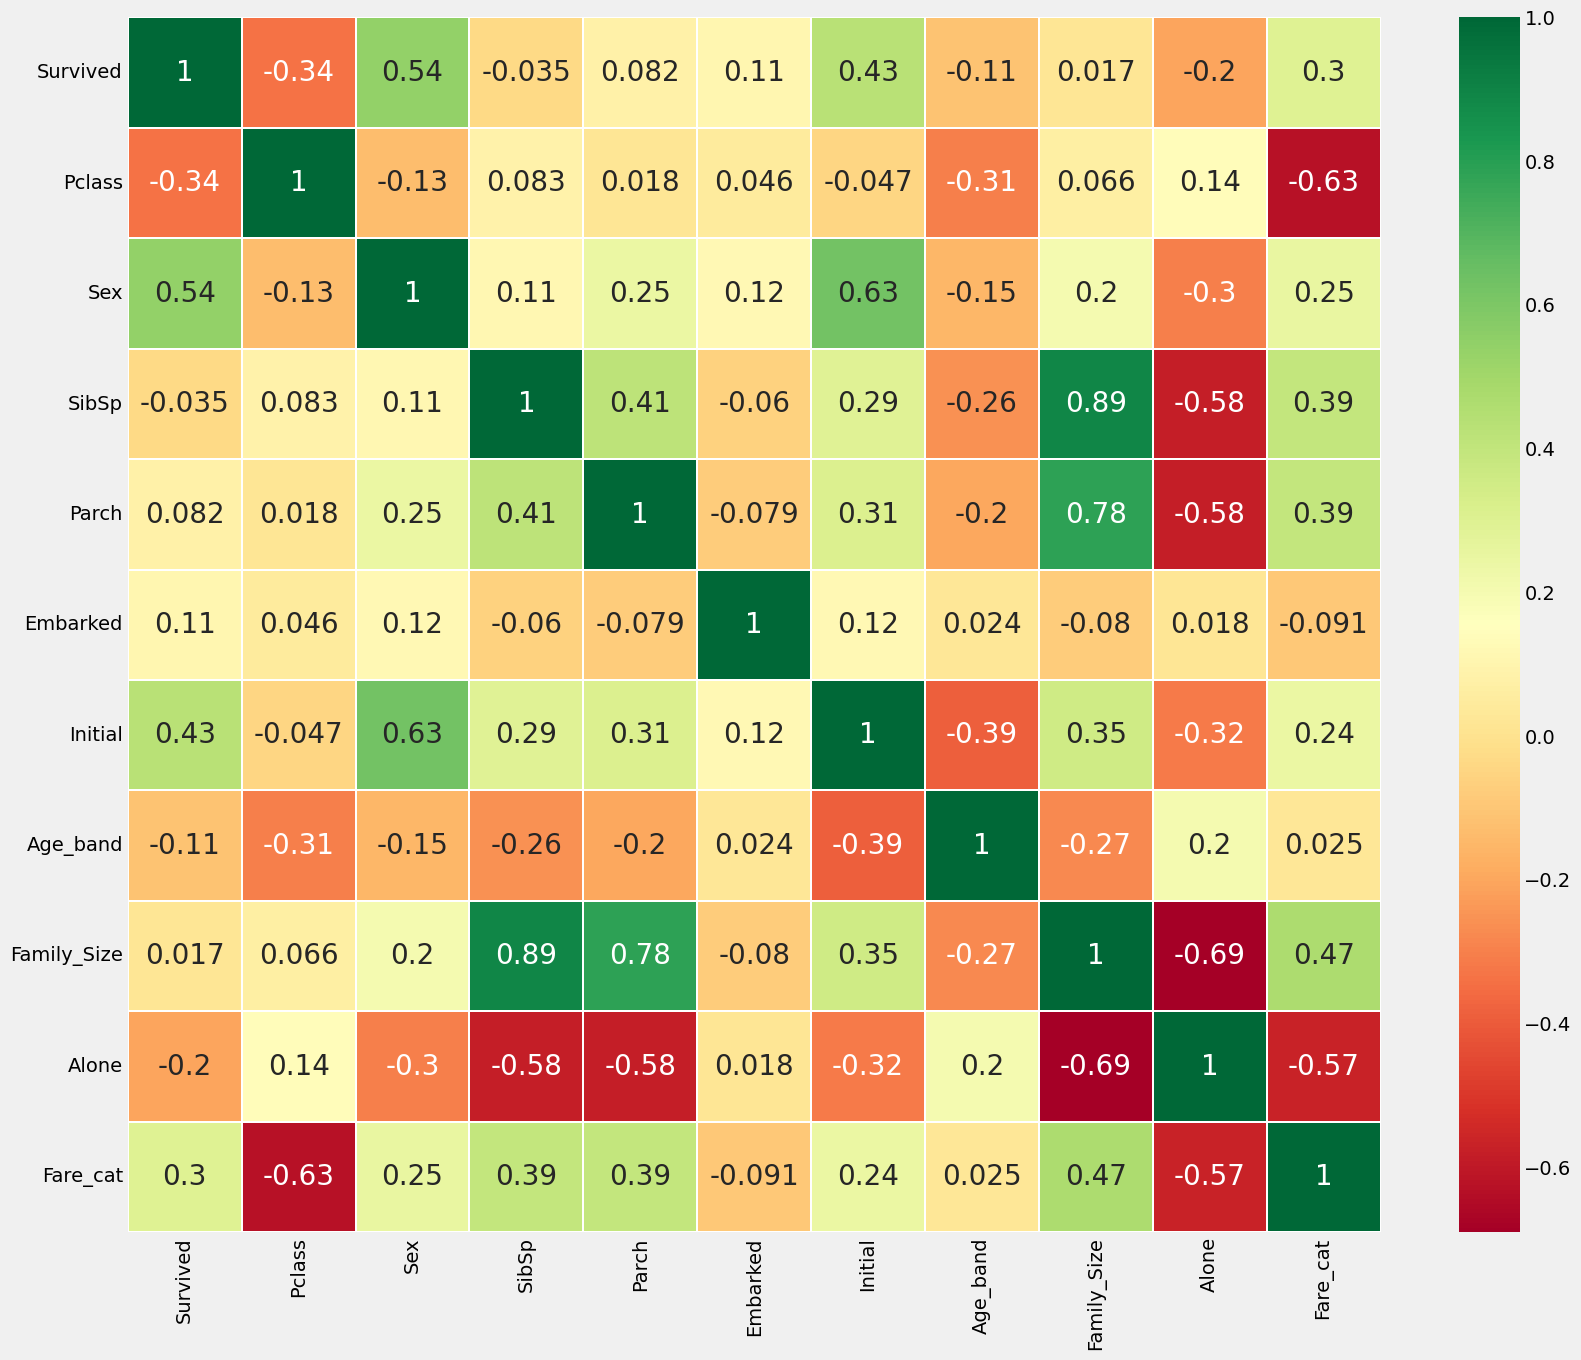

In [61]:
data.drop([c for c in ['Name', 'Age', 'Ticket', 'Fare', 'Cabin',
                       'Fare_Range', 'PassengerId']
          if c in data.columns], axis=1, inplace=True)
numeric_data = data.select_dtypes(include=[int, float])
sns.heatmap(numeric_data.corr(),annot=True, cmap='RdYlGn', linewidths=0.2,
            annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being SibSp and Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.

이제 위의 상관 관계 플롯에서 긍정적으로 관련된 몇 가지 특징을 볼 수 있습니다. 그 중 일부는 SibSp 와 Family_Size, Parch 와 Family_Size이고 일부는 Alone 및 Family_Size와 같은 부정적인 것입니다.

### Part3: Predictive Modeling
We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

### 파트3: 예측 모델링 
우리는 EDA 부분에서 몇 가지 통찰력을 얻었습니다. 하지만 그것으로는 승객이 살아남을지 죽을지 정확하게 예측하거나 알 수 없습니다. 이제 우리는 훌륭한 분류 알고리즘을 사용하여 승객의 생존 여부를 예측할 것입니다. 다음은 모델을 만드는 데 사용할 알고리즘입니다. 

1)로지스틱 회귀 

2)서포트 벡터 머신(선형 및 방사형) 

3)랜덤 포레스트 

4)K-최근접이웃 

5)나이브 베이즈 

6)의사결정 트리 

7)로지스틱 회귀

In [62]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [63]:
data = numeric_data
train, test = train_test_split(data, test_size=0.3, random_state=0,
                             stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

In [64]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1,0,1,0
836,0,3,0,0,0,0,0,1,0,1,1
639,0,3,0,1,0,0,0,2,1,0,2
389,1,2,1,0,0,1,2,1,0,1,1
597,0,3,0,0,0,0,0,3,0,1,0


#### Radial Support Vector Machines(rbf-SVM)

In [65]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accurancy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accurancy for rbf SVM is  0.835820895522388


In [66]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100* metrics.accuracy_score(prediction1, test_Y)
    print(temp_thres, 'Accurancy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accurancy for rbf SVM is 38.43%
0.01 Accurancy for rbf SVM is 38.43%
0.02 Accurancy for rbf SVM is 38.43%
0.03 Accurancy for rbf SVM is 38.43%
0.04 Accurancy for rbf SVM is 38.43%
0.05 Accurancy for rbf SVM is 38.43%
0.06 Accurancy for rbf SVM is 38.43%
0.07 Accurancy for rbf SVM is 38.43%
0.08 Accurancy for rbf SVM is 38.43%
0.09 Accurancy for rbf SVM is 38.43%
0.1 Accurancy for rbf SVM is 38.43%
0.11 Accurancy for rbf SVM is 38.81%
0.12 Accurancy for rbf SVM is 39.18%
0.13 Accurancy for rbf SVM is 39.55%
0.14 Accurancy for rbf SVM is 39.93%
0.15 Accurancy for rbf SVM is 42.16%
0.16 Accurancy for rbf SVM is 76.49%
0.17 Accurancy for rbf SVM is 80.22%
0.18 Accurancy for rbf SVM is 80.60%
0.19 Accurancy for rbf SVM is 81.34%
0.2 Accurancy for rbf SVM is 81.72%
0.21 Accurancy for rbf SVM is 81.72%
0.22 Accurancy for rbf SVM is 81.72%
0.23 Accurancy for rbf SVM is 82.09%
0.24 Accurancy for rbf SVM is 82.09%
0.25 Accurancy for rbf SVM is 82.46%
0.26 Accurancy for rbf SVM is 82.84%
0.27

Text(0, 0.5, 'accuracy score')

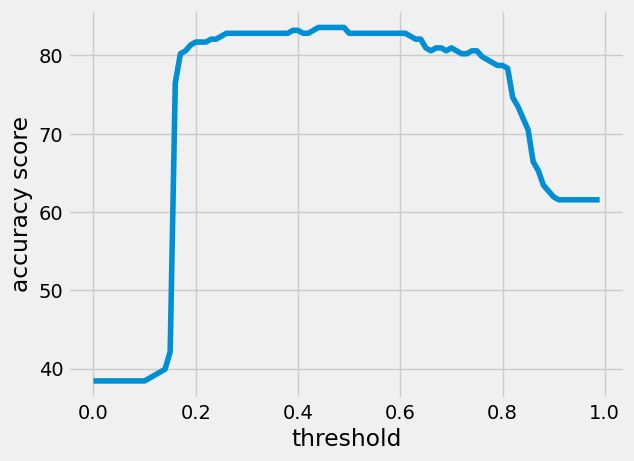

In [67]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [68]:
np.argmax(score_array)

44

In [69]:
threshold = 0.5
prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
print('Accurancy for rbf SVM is {:.2f}%'.format(100* metrics.accuracy_score(prediction1, test_Y)))

Accurancy for rbf SVM is 82.84%


In [70]:
prediction1

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0])

#### Linear Support Vector Machine(linear-SVM)

In [71]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [72]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accurcay of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accurcay of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [73]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.7985074626865671


#### K-Nearest Neighbors(KNN)

In [74]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Let's check the accuracies over various values of n_neighbours.

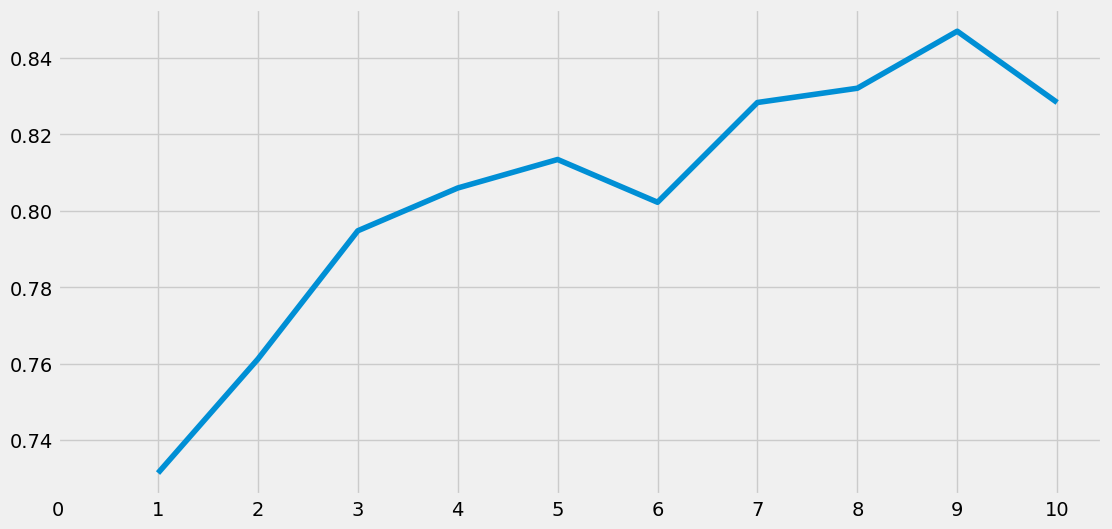

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [75]:
a_index=list(range(1,11))
a = []
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a.append(metrics.accuracy_score(prediction,test_Y))

a = pd.Series(a, index=a_index)
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values,'with the max value as ',a.max())

#### Gaussian Naive Bayes

In [76]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [77]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation.

모델의 정확도가 분류기의 견고성을 결정하는 유일한 요소는 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 정확도가 90%라고 가정해 보겠습니다.

이제 이것은 분류자에 있어서 매우 좋은 정확도인 것처럼 보이지만 앞으로 나오는 모든 새로운 테스트 세트에 대해 90%가 될 것이라고 확인할 수 있습니까??. 대답은 '아니요'입니다. 왜냐하면 분류자가 자체 학습에 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 학습 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가하거나 감소할 수 있습니다. 이를 모델 분산이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 교차 검증을 사용합니다.

## Cross Validation
Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

## 교차 검증
많은 경우 데이터가 불균형합니다. 즉, class1 인스턴스의 수가 많지만 다른 클래스 인스턴스의 수가 적을 수 있습니다. 따라서 우리는 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야 합니다. 그런 다음 데이터 세트에 대해 알려진 모든 정확도의 평균을 구할 수 있습니다.

1)K-Fold Cross Validation은 먼저 데이터 세트를 k-하위 집합으로 나누는 방식으로 작동합니다.

2)데이터 세트를 (k=5) 부분으로 나눈다고 가정해 보겠습니다. 우리는 테스트를 위해 1개 부분을 예약하고 4개 부분에 대해 알고리즘을 훈련합니다.

3)각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 train하여 과정을 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이를 K-Fold Cross Validation이라고 합니다.

4)알고리즘은 일부 훈련 데이터의 데이터 세트에 비해 과소적합될 수 있으며 때로는 다른 훈련 세트의 데이터에 과대적합될 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있습니다.

In [78]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts

xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm',
               'Radial Svm',
               'Logistic Regression',
               'KNN',
               'Decision Tree',
               'Naive Bayes',
               'Random Forest']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803620,0.043434
Naive Bayes,0.795843,0.054861
Random Forest,0.806991,0.044435


<Axes: >

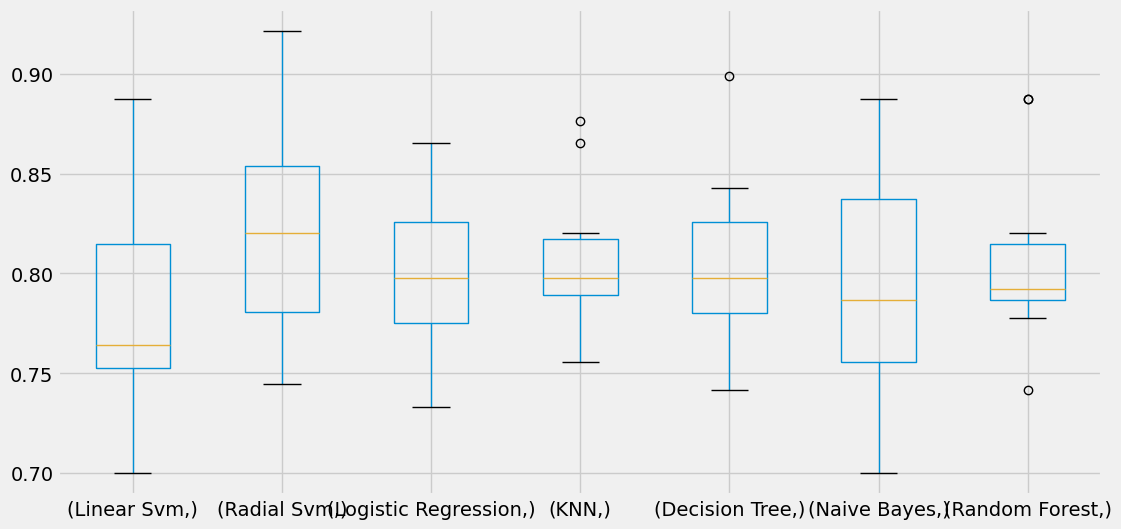

In [79]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

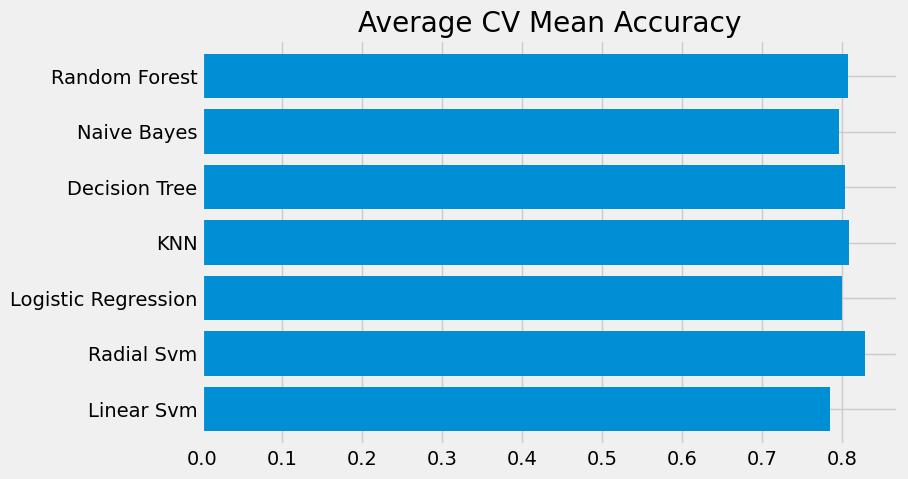

In [80]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

사망자: 1, 생존자: 99명 인 dataset.

모든 사람이 생존했다 -> 99% accuracy

사망자를 예측해야하는데, 99% accurcay, 0% (맞게 예측한 사망자 수)/전체 사망자 수 = 0%

inbalance한 데이터셋.



## Confusion Matrix
It gives the number of correct and incorrect classifications made by the classifier.

<Axes: >

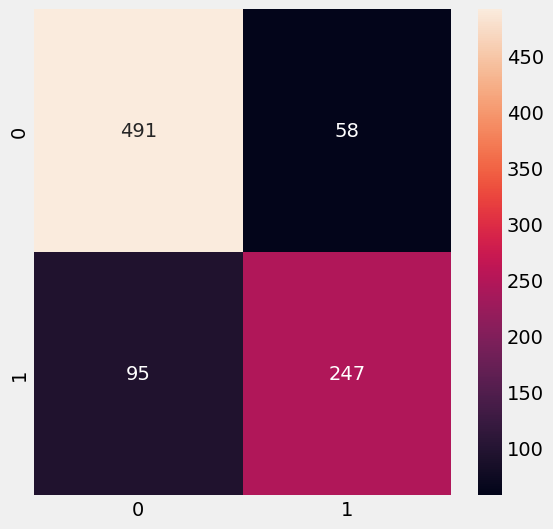

In [81]:
f,ax=plt.subplots(1,1,figsize=(6,6))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')

Precision = TP/(TP + FP)

recall = TP/(TP + FN)

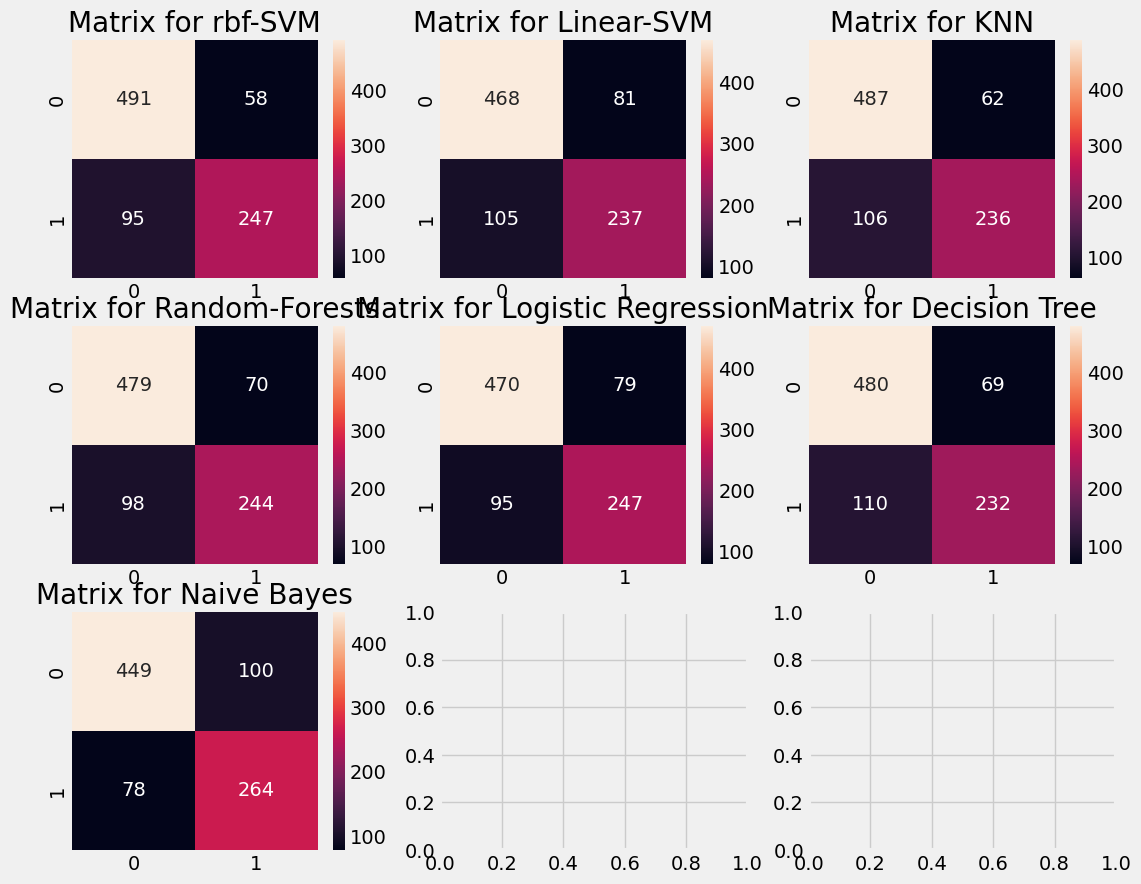

In [82]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

#### 오차 행렬 해석
왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 나타내고 오른쪽 대각선은 잘못된 예측 수를 나타냅니다. rbf-SVM에 대한 첫 번째 플롯을 고려해 보겠습니다.

1)아니오. 올바른 예측의 비율은 491(죽은 경우) + 247(생존한 경우)이며 평균 CV 정확도는 (491+247)/891 = 82.8%로 이전에 얻은 것입니다.

2)오류--> 사망자가 58명이 생존자로 잘못 분류되었고, 95명이 사망으로 생존했습니다. 따라서 죽은 것을 살아남은 것으로 예측함으로써 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴보면 rbf-SVM이 죽은 승객을 정확하게 예측할 확률이 더 높지만 NaiveBayes는 살아남은 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

#### Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

##### SVM

#### 하이퍼 매개변수 조정
머신러닝 모델은 블랙박스와 같습니다. 이 블랙박스에는 몇 가지 기본 매개변수 값이 있으며, 더 나은 모델을 얻기 위해 이를 조정하거나 변경할 수 있습니다. SVM 모델의 C 및 감마 및 다양한 분류기에 대한 유사하게 다른 매개변수를 하이퍼 매개변수라고 하며, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있습니다. 이를 하이퍼 매개변수 조정이라고 합니다.

우리는 SVM과 RandomForests라는 최고의 분류기 2개에 대한 하이퍼 매개변수를 조정할 것입니다.

##### SVM

In [83]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


##### Random Forests

In [84]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-Svm is 82.82% with C=0.05 and gamma=0.1.

For RandomForest, score is abt 81.8% with n_estimators=900.

## Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

### Voting Classifier
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [85]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
    ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
    ('LR', LogisticRegression(C=0.05)),
    ('DT', DecisionTreeClassifier(random_state=0)),
    ('NB', GaussianNB()),
    ('svm', svm.SVC(kernel='linear', probability=True))
], voting='soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging
Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

##### Bagged KNN
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [86]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.


##### AdaBoost(Adaptive Boosting)
The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


##### Stochastic Gradient Boosting
Here too the weak learner is a Decision Tree.

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad,X,Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


##### XGBoost

In [88]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning.

##### Hyper-Parameter Tuning for AdaBoost

In [91]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


#### Boosting과 Voting의 차이
boosting Algo A - a, b, c, d, e, f, g, h, i, j, k, l ... weak learner boosting

boosting Algo B - a, b, c, d, e, f, g, h, i, j, k, l ... weak learner boosting

LinearRegression C


Voting ( A, B, C ..)

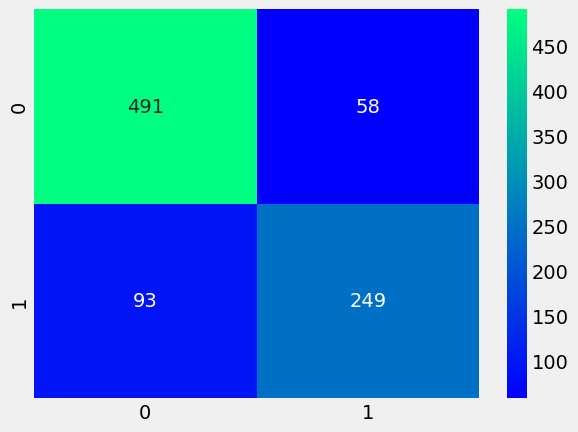

In [92]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

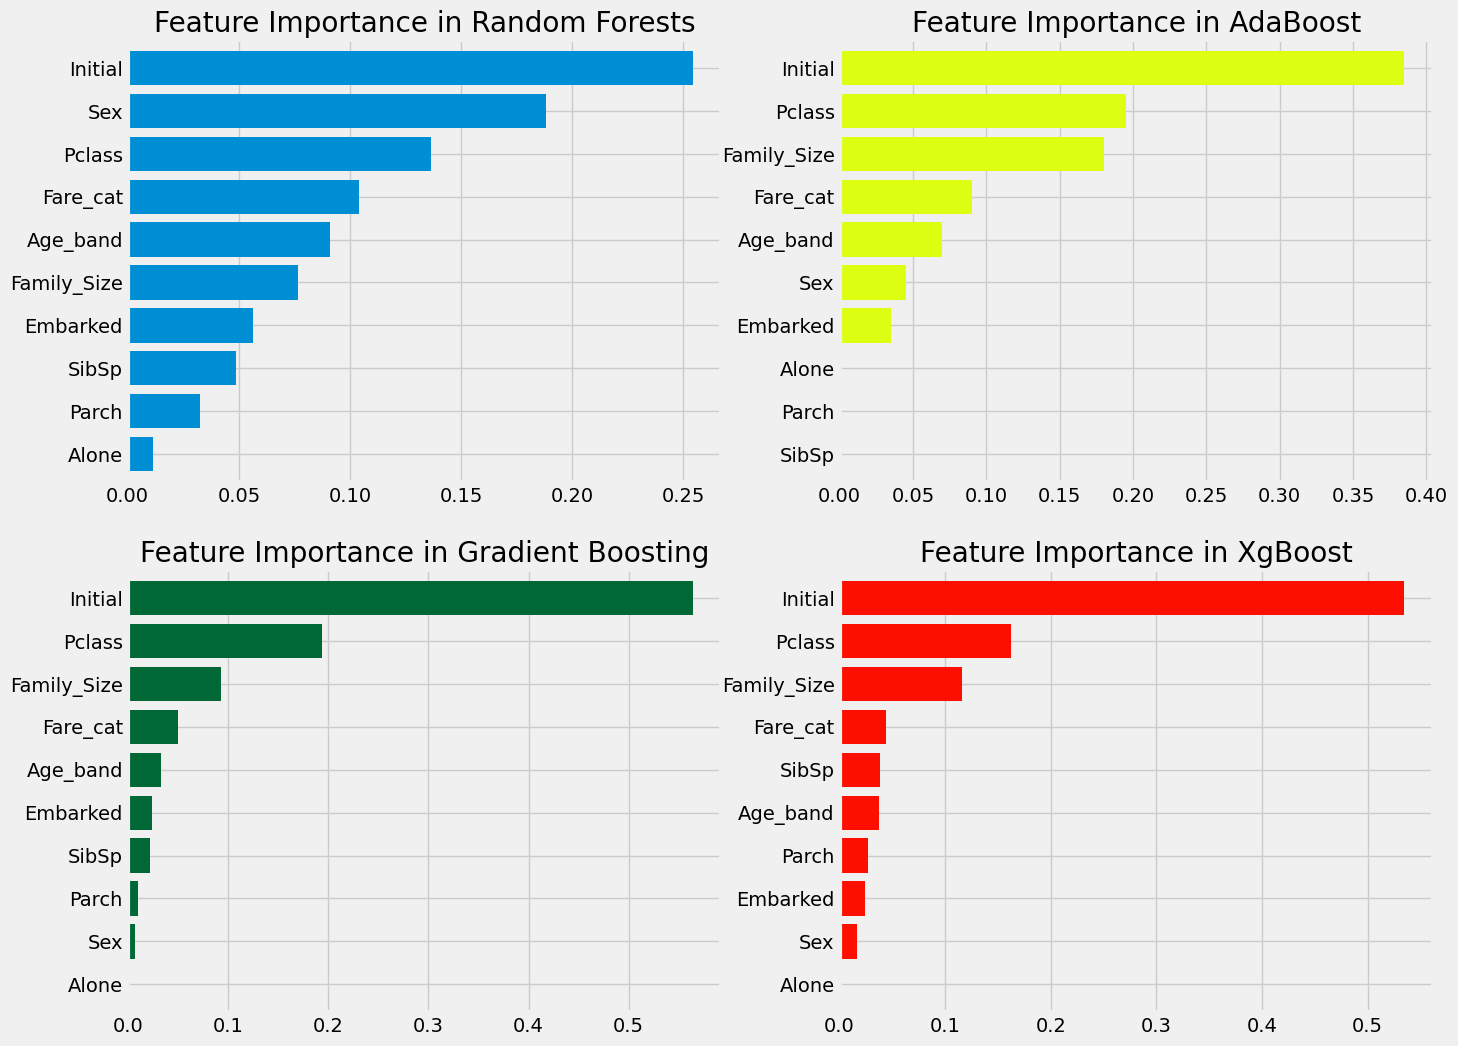

In [94]:
f, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,
          X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

보통 이런 feature importance를 볼 때 RandomForest를 많이 쓴다. 아니면 위와 같은 과정으로 4개중 평균을 내기도 함.

We can see the important features for various classifiers like RandomForests, AdaBoost, etc.

##### Observations:
1)Some of the common important features are Initial, Fare_cat, Pclass, Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is as the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch and SibSp.